In [1]:
#modeling

In [2]:
#导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel, RationalQuadratic, DotProduct
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# 加载数据
data_cleaned = pd.read_csv('./iBite_table_processed.csv')

# 对数缩放：处理数据分布不均的特征
data_cleaned['log_head_volume'] = np.log1p(data_cleaned['head_volume'])  # 加1避免取对数的负值
data_cleaned['log_body_l'] = np.log1p(data_cleaned['body.l'])

# 特征和目标变量
feature_cols = ['head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l', 'head_w_body_l_ratio', 'head_volume', 'wing_body_ratio', 'latitude', 'longitude']

/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
# 特征和目标变量
# 直接使用经纬度作为特征
X = data_cleaned[['latitude', 'longitude']]
# 结合其他特征
X = pd.concat([X, data_cleaned[['head_volume', 'wing_body_ratio','head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l']]], axis=1)

# 用于后续模型训练
y = data_cleaned['iBite']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
X

,latitude,longitude,head_volume,wing_body_ratio,head.w,head.h,head.l,th.w,body.l,wing.l
0,-1.235132,1.425063,17.004975,1.065741,-0.262986,-0.142677,-0.766951,-0.430514,0.043552,0.660228
1,-1.235132,1.425063,17.004975,1.065741,-0.262986,-0.142677,-0.766951,-0.430514,0.043552,0.660228
2,-1.235132,1.425063,19.937232,0.941541,-0.127646,-0.076605,-0.734680,-0.290133,0.348621,0.762769
3,-1.402920,1.462618,20.905920,1.149041,-0.184905,0.016674,-0.721772,-0.094451,-0.048041,0.687047
4,0.977303,-0.279847,14.278680,0.000000,-0.247370,-0.088265,-0.979938,0.224597,-0.319934,-1.155538
...,...,...,...,...,...,...,...,...,...,...
1350,0.979260,-0.279480,1.770304,0.890255,-1.210370,-1.157081,-0.534602,-1.213245,-0.751934,-0.413298
1351,0.979260,-0.279480,2.016000,0.875121,-1.184343,-1.133761,-0.528148,-1.208991,-0.769243,-0.442483
1352,0.979260,-0.279480,1.934280,0.905738,-1.231191,-1.125988,-0.534602,-1.196229,-0.810351,-0.458258
1353,0.979260,-0.279480,1.672902,0.847280,-1.278040,-1.129874,-0.612052,-1.145181,-0.824775,-0.516628



Testing kernel: RBF


/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Train MSE: 387644.2565, Train R2: 0.1426
Test MSE: 468506.9409, Test R2: 0.0450
Optimized kernel: 316**2 * RBF(length_scale=13) + WhiteKernel(noise_level=1e+05)

Testing kernel: Matern_nu1.5


/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Train MSE: 354745.6896, Train R2: 0.2153
Test MSE: 453235.2674, Test R2: 0.0762
Optimized kernel: 316**2 * Matern(length_scale=10.4, nu=1.5) + WhiteKernel(noise_level=1e+05)

Testing kernel: Matern_nu0.5


/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Train MSE: 294397.4040, Train R2: 0.3488
Test MSE: 423722.8312, Test R2: 0.1363
Optimized kernel: 316**2 * Matern(length_scale=11.8, nu=0.5) + WhiteKernel(noise_level=1e+05)

Testing kernel: RationalQuadratic


/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Train MSE: 174364.0743, Train R2: 0.6143
Test MSE: 414176.2748, Test R2: 0.1558
Optimized kernel: 316**2 * RationalQuadratic(alpha=0.0547, length_scale=1.65e-05) + WhiteKernel(noise_level=1e+05)

Testing kernel: DotProduct
Train MSE: 414386.3827, Train R2: 0.0834
Test MSE: 447412.2813, Test R2: 0.0880
Optimized kernel: 90.1**2 * DotProduct(sigma_0=14.3) + WhiteKernel(noise_level=1e+05)

Comparison of kernel performance:

Kernel: RBF
Train MSE: 387644.2565, Train R²: 0.1426
Test MSE: 468506.9409, Test R²: 0.0450
Optimized Kernel: 316**2 * RBF(length_scale=13) + WhiteKernel(noise_level=1e+05)

Kernel: Matern_nu1.5
Train MSE: 354745.6896, Train R²: 0.2153
Test MSE: 453235.2674, Test R²: 0.0762
Optimized Kernel: 316**2 * Matern(length_scale=10.4, nu=1.5) + WhiteKernel(noise_level=1e+05)

Kernel: Matern_nu0.5
Train MSE: 294397.4040, Train R²: 0.3488
Test MSE: 423722.8312, Test R²: 0.1363
Optimized Kernel: 316**2 * Matern(length_scale=11.8, nu=0.5) + WhiteKernel(noise_level=1e+05)

Kernel: R

/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


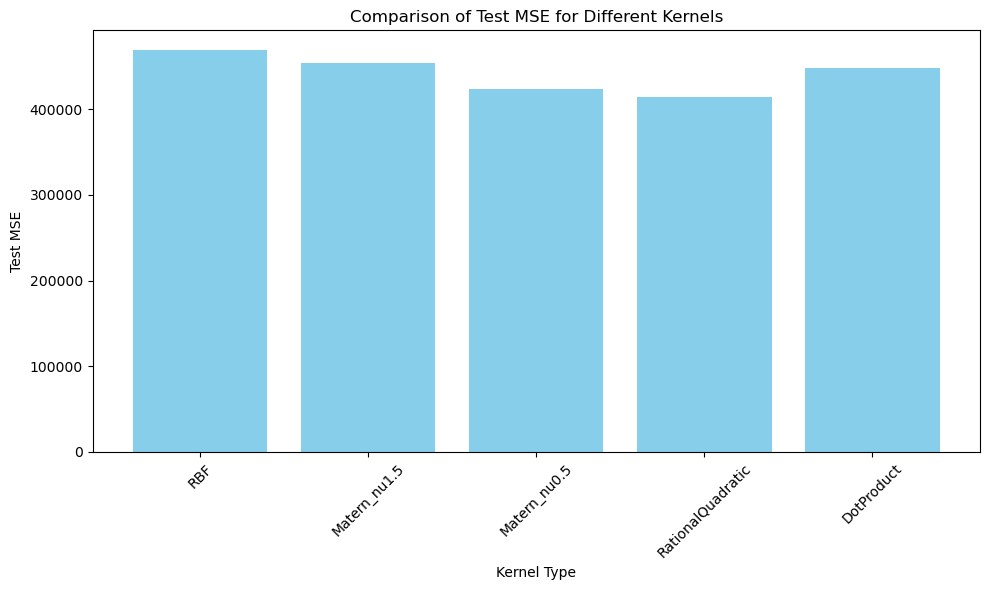

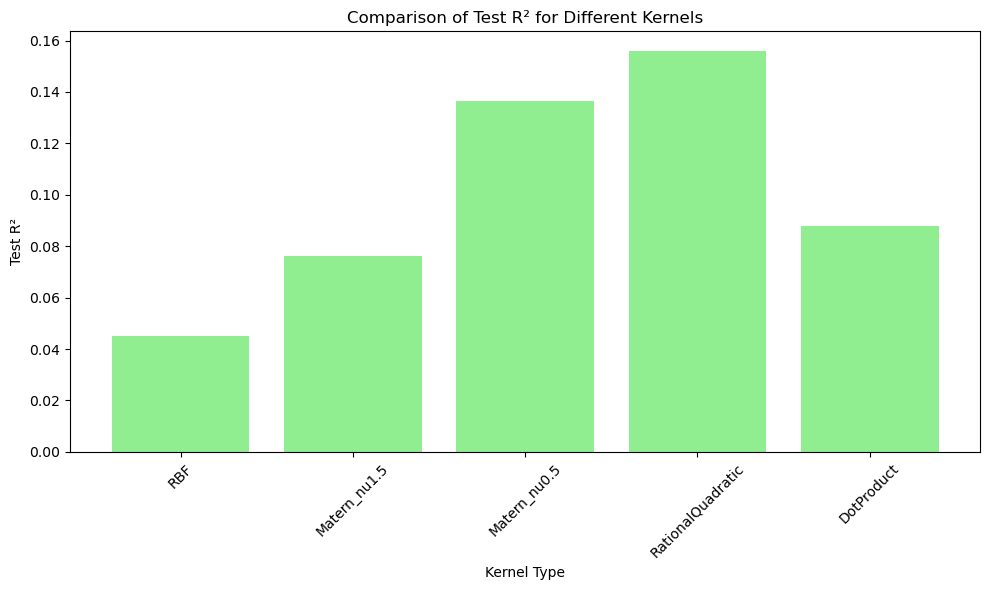

In [7]:
#gp
# 定义核函数
# kernel = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)
# kernel = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1.0)
kernels = {
    'RBF': ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0),
    'Matern_nu1.5': ConstantKernel(1.0) * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1.0),
    'Matern_nu0.5': ConstantKernel(1.0) * Matern(length_scale=1.0, nu=0.5) + WhiteKernel(noise_level=1.0),
    'RationalQuadratic': ConstantKernel(1.0) * RationalQuadratic(length_scale=1.0, alpha=1.0) + WhiteKernel(noise_level=1.0),
    'DotProduct': ConstantKernel(1.0) * DotProduct(sigma_0=1.0) + WhiteKernel(noise_level=1.0)
}

# 训练模型
# 循环遍历每种核函数
results = {}
for kernel_name, kernel in kernels.items():
    print(f"\nTesting kernel: {kernel_name}")
    
    # 训练高斯过程回归模型
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42) # normalize_y=True
    gpr.fit(X_train, y_train)
    
    # 预测
    y_pred_train, sigma_train = gpr.predict(X_train, return_std=True)
    y_pred_test, sigma_test = gpr.predict(X_test, return_std=True)
    
    # 模型评估
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"Train MSE: {train_mse:.4f}, Train R2: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R2: {test_r2:.4f}")
    print(f"Optimized kernel: {gpr.kernel_}")
    
    # 存储结果
    results[kernel_name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Optimized Kernel': gpr.kernel_
    }

# 比较不同核函数的结果
print("\nComparison of kernel performance:")
for kernel_name, metrics in results.items():
    print(f"\nKernel: {kernel_name}")
    print(f"Train MSE: {metrics['Train MSE']:.4f}, Train R²: {metrics['Train R²']:.4f}")
    print(f"Test MSE: {metrics['Test MSE']:.4f}, Test R²: {metrics['Test R²']:.4f}")
    print(f"Optimized Kernel: {metrics['Optimized Kernel']}")


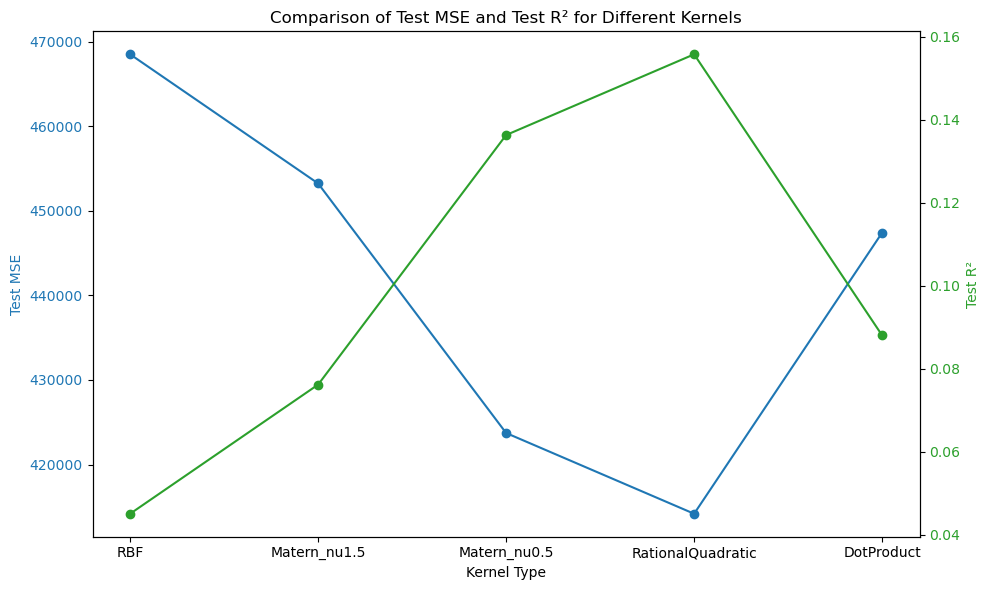

In [9]:
# 生成可视化对比图
kernel_names = list(results.keys())
test_mse_scores = [results[kernel]['Test MSE'] for kernel in kernel_names]
test_r2_scores = [results[kernel]['Test R²'] for kernel in kernel_names]

# 绘制双轴折线图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 画 Test MSE 折线图
color = 'tab:blue'
ax1.set_xlabel('Kernel Type')
ax1.set_ylabel('Test MSE', color=color)
ax1.plot(kernel_names, test_mse_scores, marker='o', color=color, label='Test MSE')
ax1.tick_params(axis='y', labelcolor=color)

# 在同一个图上添加第二个 y 轴来表示 Test R²
ax2 = ax1.twinx()  # 共享同一个 x 轴
color = 'tab:green'
ax2.set_ylabel('Test R²', color=color)
ax2.plot(kernel_names, test_r2_scores, marker='o', color=color, label='Test R²')
ax2.tick_params(axis='y', labelcolor=color)

# 标题和布局设置
plt.title('Comparison of Test MSE and Test R² for Different Kernels')
fig.tight_layout()

# 显示图表
plt.xticks(rotation=45)
plt.show()


Train MSE: 354745.6896, Train R2: 0.2153
Test MSE: 453235.2674, Test R2: 0.0762


/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


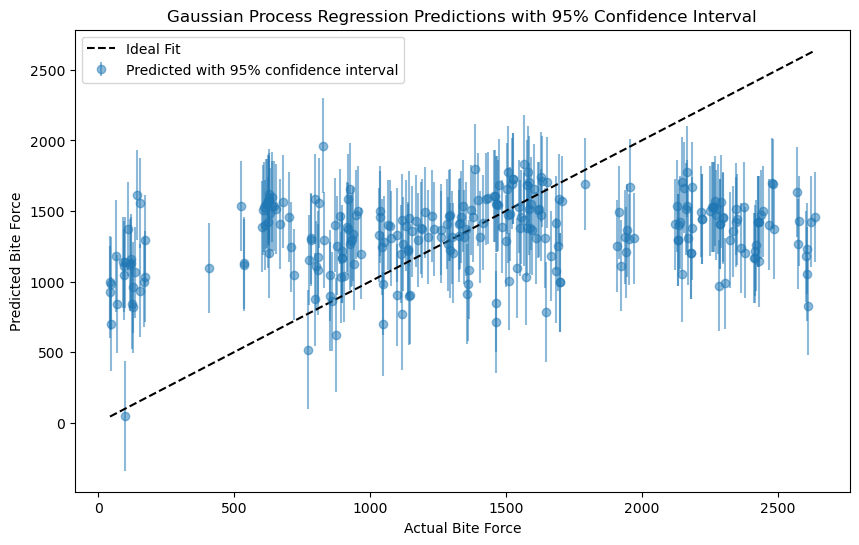

Optimized kernel: 316**2 * Matern(length_scale=10.4, nu=1.5) + WhiteKernel(noise_level=1e+05)


In [10]:
# 高斯过程回归模型设置
# 核函数：尝试不同的核函数组合
kernel = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1.0)
# kernel = C(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)

gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr.fit(X_train, y_train)

# 模型预测
y_pred_train, sigma_train = gpr.predict(X_train, return_std=True)
y_pred_test, sigma_test = gpr.predict(X_test, return_std=True)

# 模型性能评估
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}, Train R2: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R2: {test_r2:.4f}")

# 可视化预测结果：测试集
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_pred_test, yerr=sigma_test, fmt='o', alpha=0.5, label='Predicted with 95% confidence interval')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', label='Ideal Fit')
plt.title("Gaussian Process Regression Predictions with 95% Confidence Interval")
plt.xlabel("Actual Bite Force")
plt.ylabel("Predicted Bite Force")
plt.legend()
plt.show()

# 显示优化的核函数
print(f"Optimized kernel: {gpr.kernel_}")

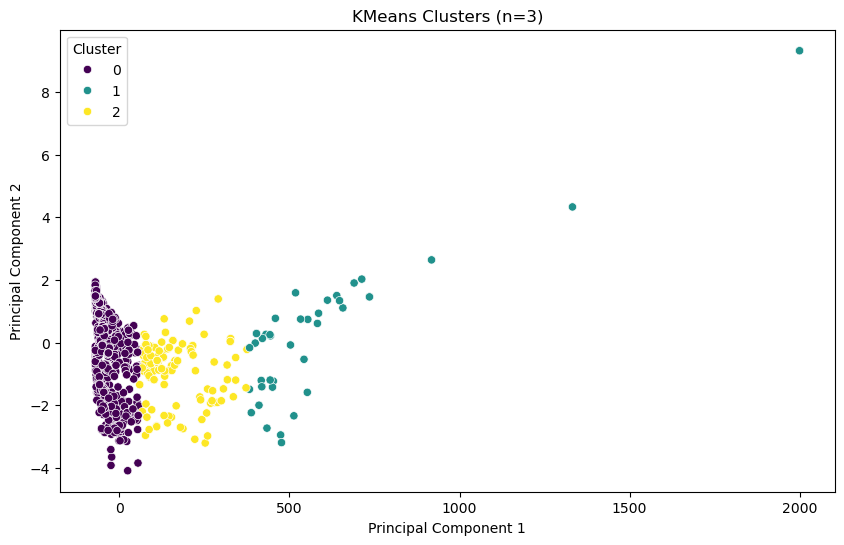

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 使用主成分分析降维到2维，便于可视化
# pca = PCA(n_components=min(X.shape[0], X.shape[1]))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# 确定聚类数量（可以使用肘部法或轮廓系数）
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_components)
clusters = kmeans.labels_

# 将聚类结果添加到数据中
data_cleaned['cluster'] = clusters

# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis')
plt.title('KMeans Clusters (n=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 416278.4375 - mae: 515.4136
Deep Learning Model MAE: 545.3209


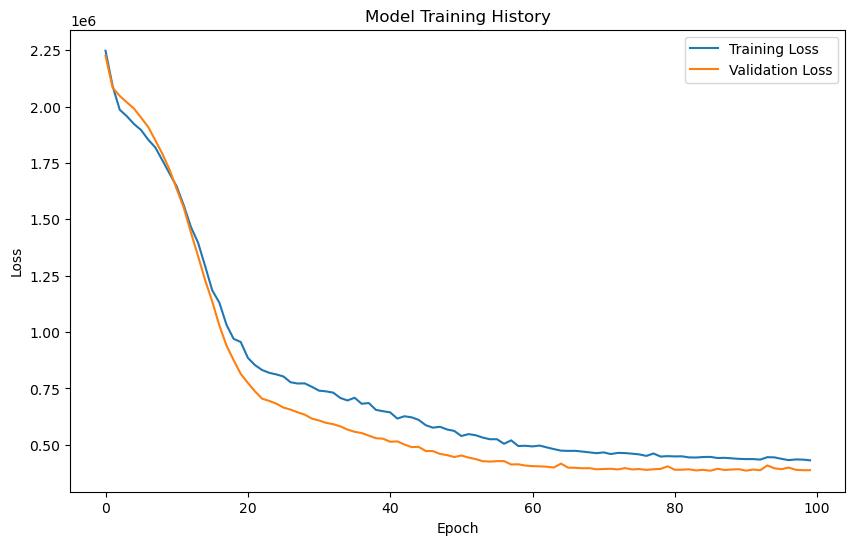

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# 构建深度学习模型
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 回归问题输出一个值

# 编译模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

# 评估模型
loss, mae = model.evaluate(X_test, y_test)
# 根据实际的 MAE 值
print(f'Deep Learning Model MAE: {mae:.4f}')

# 可视化训练过程
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
